In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing


# EDA

In [2]:
titanic_df = pd.read_csv("data/titanic_data.csv")
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1450 non-null   int64  
 1   Name      1450 non-null   object 
 2   Sex       1450 non-null   object 
 3   Age       1167 non-null   float64
 4   SibSp     1450 non-null   int64  
 5   Parch     1450 non-null   int64  
 6   Ticket    1450 non-null   object 
 7   Fare      1448 non-null   float64
 8   Cabin     340 non-null    object 
 9   Embarked  1448 non-null   object 
 10  Survived  1450 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 124.7+ KB


In [3]:
# Note that:
#SibSp - Number of siblings/spouses aboard
#Parch - Number of parents/children aboard
titanic_df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.34,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.55,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,0


In [4]:
titanic_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1450.000000,1167.000000,1450.000000,1450.000000,1448.000000,1450.000000
mean,2.294483,30.043702,0.489655,0.382759,34.785877,0.376552
std,0.850143,14.610165,1.012123,0.856336,54.036318,0.484688
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.900000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.450000,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.390000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.330000,1.000000


In [5]:
#Percentage of nulls 
titanic_df.isnull().mean() * 100

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.517241
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.137931
Cabin       76.551724
Embarked     0.137931
Survived     0.000000
dtype: float64

## Data Cleaning & feature engineering

In [6]:
#Age is skewed and has a significant number of missing values so best to replace missing values with median of data
age_median = titanic_df['Age'].median(skipna=True)
titanic_df['Age'].fillna(age_median, inplace=True)

In [7]:
#Cabin has too many missing values and will be completely dropped from the dataframe
titanic_df.drop('Cabin', axis=1, inplace=True)

In [8]:
#Embarked only has 2 missing values and can be replaced with the most common which is S
titanic_df['Embarked'].fillna("S", inplace=True)

In [9]:
#Fare has one missing value and can be replaced with the median
fare_median = titanic_df['Fare'].median(skipna=True)
titanic_df['Fare'].fillna(fare_median,inplace=True)

In [10]:
#Drop unnecessary variables
titanic_df.drop('Ticket', axis=1, inplace=True)
titanic_df.drop('Name', axis=1, inplace=True)

In [11]:
#Hot Encode PClass, Sex, Embarked
le = preprocessing.LabelEncoder()
pclass_cat = le.fit_transform(titanic_df.Pclass)
sex_cat = le.fit_transform(titanic_df.Sex)
embarked_cat = le.fit_transform(titanic_df.Embarked)

#Initialize the encoded categorical columns
titanic_df['pclass_cat'] = pclass_cat
titanic_df['sex_cat'] = sex_cat
titanic_df['embarked_cat'] = embarked_cat

#Drop old categorical fields from dataframe and reindex
dummy_fields = ['Pclass','Sex','Embarked']
data = titanic_df.drop(dummy_fields, axis = 1)
data = titanic_df.reindex(['pclass_cat','sex_cat','Age','Fare','embarked_cat','SibSp', 'Parch','Survived'],axis=1)

In [12]:
data

,pclass_cat,sex_cat,Age,Fare,embarked_cat,SibSp,Parch,Survived
0,0,0,29.0,211.34,2,0,0,1
1,0,1,1.0,151.55,2,1,2,1
2,0,0,2.0,151.55,2,1,2,0
3,0,1,30.0,151.55,2,1,2,0
4,0,0,25.0,151.55,2,1,2,0
...,...,...,...,...,...,...,...,...
1445,2,0,38.0,7.23,0,0,0,1
1446,2,1,51.0,7.75,2,0,0,0
1447,2,1,18.0,6.50,2,1,0,0
1448,2,1,21.0,6.50,2,1,0,0


In [13]:
#Make sure data is clean/check for null
data[data.isnull().any(axis=1)].head()

,pclass_cat,sex_cat,Age,Fare,embarked_cat,SibSp,Parch,Survived


## Models

### Test Train Split

In [14]:
#Split inputs and output
X = data.iloc[:, 0:7] 
Y = data.iloc[:, 7]

In [15]:
#Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Naive Bayes Classifier

In [16]:
#NB - All columns
#Initialize + fit model
gnb = GaussianNB().fit(X_train, y_train)

#Predictions
y_pred = gnb.predict(X_test)

#Accuracy Score
NB_all_accuracy = accuracy_score(y_test,y_pred)
print('Naive Bayes Model Accuracy with all attributes: {0:.2f}'.format(NB_all_accuracy))

Naive Bayes Model Accuracy with all attributes: 0.77


### Decision Tree 

In [17]:
#DT1 - All attributes
#Initalize + fit model
tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, random_state=5).fit(X_train, y_train)

#Predictions
y_pred = tree.predict(X_test)

#Accuracy Score
tree_all_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy with all attributes: {0:.2f}'.format(tree_all_accuracy))

Decision Tree Accuracy with all attributes: 0.80


In [18]:
print(tree.feature_importances_)

[0.12301568 0.20782515 0.27060174 0.29063967 0.04404703 0.04651592
 0.01735482]


In [19]:
high_importance = ['sex_cat','Age','Fare']
X_train2 = X_train[high_importance]
X_test2 = X_test[high_importance]

In [20]:
#DT2 - Top 3 features only
#Initialize + fit model
tree2 = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, random_state=5).fit(X_train2, y_train)

#Predictions 
y_pred2 = tree2.predict(X_test2)

#Accuracy Score
tree_imp_accuracy = accuracy_score(y_test, y_pred2)
print('Decision Tree Accuracy with high importance attributes: {0:.2f}'.format(tree_imp_accuracy))

Decision Tree Accuracy with high importance attributes: 0.79


### Random Forest

In [21]:
#RF1 - All attributes
#Initalize + fit model
clf = RandomForestClassifier(n_jobs=2, random_state=0).fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)

#Accuracy Score
RF_all_accuracy = accuracy_score(y_test,y_pred)
print('Random Forest Accuracy with all attributes: {0:.2f}'.format(RF_all_accuracy))

Random Forest Accuracy with all attributes: 0.81


In [22]:
print(clf.feature_importances_)

[0.08497431 0.23828042 0.28122396 0.2738646  0.03787262 0.04559691
 0.03818718]


In [23]:
#RF2 - Top 3 features only
#Initialize + fit model
clf2 = RandomForestClassifier(n_jobs=2, random_state=0).fit(X_train2, y_train)

#Predictions
y_pred2 = clf2.predict(X_test2)

#Accuracy Score
RF_imp_accuracy = accuracy_score(y_test,y_pred2)
print('Random Forest Accuracy with high importance attributes: {0:.2f}'.format(RF_imp_accuracy))

Random Forest Accuracy with high importance attributes: 0.80


### Neural Network

In [24]:
# Define the MLPClassifier with optimized parameters
model = MLPClassifier()

In [25]:
# Train the model
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
nn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {nn_accuracy}")

Accuracy: 0.7793103448275862


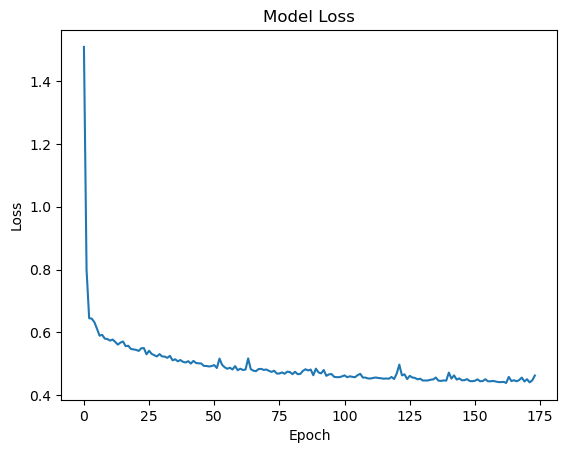

Confusion Matrix:
[[210  53]
 [ 43 129]]


In [26]:
# Plot loss curve (loss = cost in sklearn)
plt.plot(model.loss_curve_)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

## Compare Accuracy Scores


In [27]:
#All Accuracies
print('NB accuracy: {0:.2f}'.format(NB_all_accuracy))

print("Decision Tree:")
print('All attributes: {0:.2f}'.format(tree_all_accuracy))
print('High importance attributes: {0:.2f}'.format(tree_imp_accuracy))

print("Random Forest:")
print('All attributes: {0:.2f}'.format(RF_all_accuracy))
print('High importance attributes: {0:.2f}'.format(RF_imp_accuracy))

print("Neural Network: ")
print('All attributes: {0:.2f}'.format(nn_accuracy))

NB accuracy: 0.77
Decision Tree:
All attributes: 0.80
High importance attributes: 0.79
Random Forest:
All attributes: 0.81
High importance attributes: 0.80
Neural Network: 
All attributes: 0.78
